<a href="https://colab.research.google.com/github/Priyanka95-data/Time-Series--BullDozer-Price-prediction/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting the Annual water Usage using Time Series Analysis

In this notebook,we're going to go through an example of Time-Series with an end goal to predict the amount of water that will be consumed.

## Problem Definition

How well we can predict the future supply of water, given it's supply in litres consumed per day for 79 years and how many litres will used in the future?

## Data
The data has been taken from a book: Desktop --> Study Material --> Time Series
--> Water.csv
There's only one dataset-
It consists of 2 main columns: Year and Water supply in Litres
Year data lasts from the Timeframe 1885 - 1963

## Evaluation
The evaluation for this project is 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Importing training data
from google.colab import files
uploaded= files.upload()

Saving water.csv to water.csv


## Data Transformation

In [ ]:
Water_Supply= pd.read_csv("water.csv")
Water_Supply.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [ ]:
Water_Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    79 non-null     int64
 1   Water   79 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [ ]:
Water_Supply.columns

Index(['Year', 'Water'], dtype='object')

In [ ]:
#Checking the missing values
Water_Supply.isna().sum()

Year     0
Water    0
dtype: int64

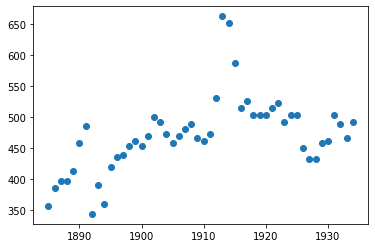

In [ ]:
#Plotting the data on the Scatter Plot
fig,ax= plt.subplots()
ax.scatter(Water_Supply["Year"][:50], Water_Supply["Water"][:50])

In [ ]:
Water_Supply["Year"][:50]

0     1885
1     1886
2     1887
3     1888
4     1889
5     1890
6     1891
7     1892
8     1893
9     1894
10    1895
11    1896
12    1897
13    1898
14    1899
15    1900
16    1901
17    1902
18    1903
19    1904
20    1905
21    1906
22    1907
23    1908
24    1909
25    1910
26    1911
27    1912
28    1913
29    1914
30    1915
31    1916
32    1917
33    1918
34    1919
35    1920
36    1921
37    1922
38    1923
39    1924
40    1925
41    1926
42    1927
43    1928
44    1929
45    1930
46    1931
47    1932
48    1933
49    1934
Name: Year, dtype: int64

In [ ]:
Water_Supply.Year.dtype

dtype('int64')

In [ ]:
Water_Supply["Water"][:50]

0     356
1     386
2     397
3     397
4     413
5     458
6     485
7     344
8     390
9     360
10    420
11    435
12    439
13    454
14    462
15    454
16    469
17    500
18    492
19    473
20    458
21    469
22    481
23    488
24    466
25    462
26    473
27    530
28    662
29    651
30    587
31    515
32    526
33    503
34    503
35    503
36    515
37    522
38    492
39    503
40    503
41    450
42    432
43    432
44    458
45    462
46    503
47    488
48    466
49    492
Name: Water, dtype: int64

In [ ]:
Water_Supply.Water.dtype

dtype('int64')

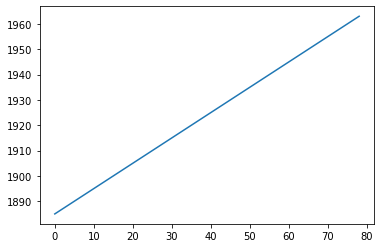

In [ ]:
Water_Supply.Year.plot.line()

In [ ]:
Water_Supply.describe()

,Year,Water
count,79.000000,79.000000
mean,1924.000000,512.025316
std,22.949219,75.685072
min,1885.000000,344.000000
25%,1904.500000,462.000000
50%,1924.000000,503.000000
75%,1943.500000,581.000000
max,1963.000000,662.000000


In [ ]:
len(Water_Supply)

79

In [ ]:
Water_Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    79 non-null     int64
 1   Water   79 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [ ]:
Mean1= 356+386+397+397+413/5
Mean1

1618.6

In [ ]:
Mean2= 458+485+344+390+360/5
Mean2

1749.0

Hence we can say that the model is not stationary as the mean 1 and 2 are not the same. 

# Indexing with Time Series



In [ ]:
Water_Supply= Water_Supply.set_index('Year')
Water_Supply.index 

Int64Index([1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
            1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
            1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
            1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
            1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
            1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
            1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963],
           dtype='int64', name='Year')

# Visualizing the water supply Time Series Data

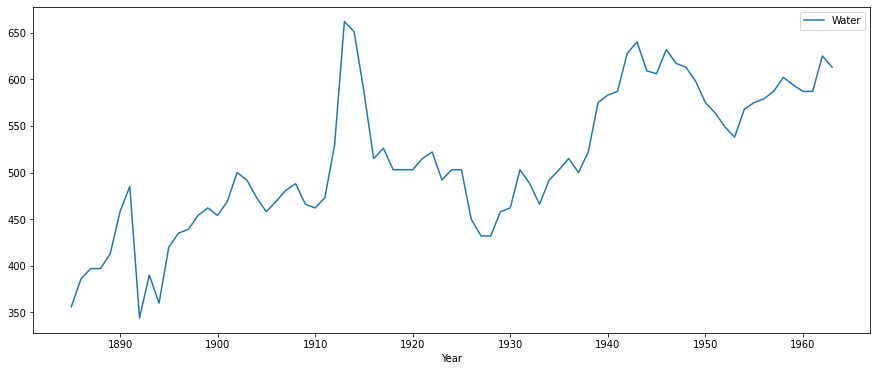

In [ ]:
Water_Supply.plot(figsize= (15,6))
plt.show()

# Manual Differencing

We can difference the dataset manually.

This involves developing a new function that creates a differenced dataset. The function would loop through a provided series and calculate the differenced values at the specified interval or lag.

The function below named difference() implements this procedure.

In [ ]:
# Create a differenced series
def difference(Water_Supply, interval=1):
  diff= list()
  for i in range(interval, len(Water_Supply)):
    value= Water_Supply[i]- Water_Supply[i - interval]
    diff.append(value)
  return Water_Supply(diff)  

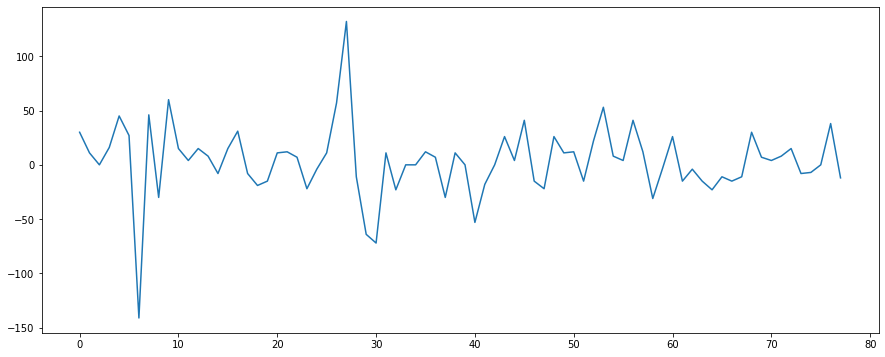

In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
series = read_csv('water.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
diff = difference(X)
plt.figure(figsize=(15,6))
pyplot.plot(diff)
pyplot.show() 

We can see that the Water supply data has a clear trend.

This suggests that time series is not stationary and will require a differencing to make it stationary, atleast a difference order of 1.

Let's also take a quick look at the autocorrelation plot of the time series.

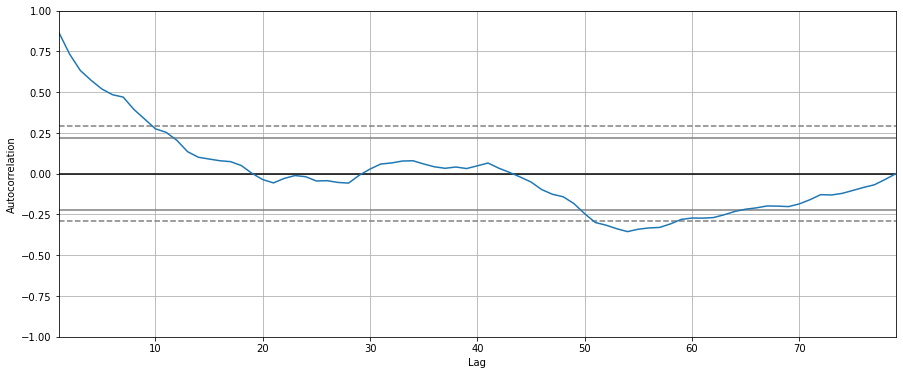

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.figure(figsize=(15,6))
autocorrelation_plot(Water_Supply)
pyplot.show()

Running the above autocorrelation we can see that there is a positive correlation between 10-to-18 lags which is significant for first 5 lags.

Thus a good starting point for the AR parameter may be 5.

# ARIMA MODEL 

The statsmodel library helps to fit the ARIMA model.

An ARIMA model can be created using statsmodel library as follows:
1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

Let’s start off with something simple. We will fit an ARIMA model to the entire Water Supply dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Water   No. Observations:                   78
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -380.048
Method:                       css-mle   S.D. of innovations             31.568
Date:                Thu, 18 Jun 2020   AIC                            774.096
Time:                        21:44:33   BIC                            790.593
Sample:                             1   HQIC                           780.700
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0672      2.477      1.238      0.220      -1.788       7.922
ar.L1.D.Water    -0.0023      0.113     -0.020      0.984      -0.224       0.220
ar.L2.D.Water    -0.1264      0.113     

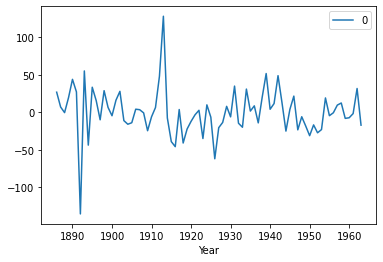

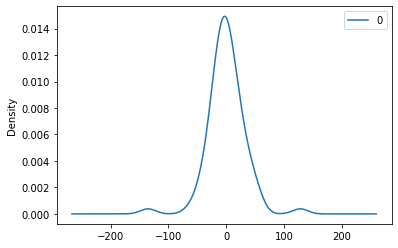

                0
count   78.000000
mean     0.230971
std     31.785070
min   -135.216763
25%    -15.416862
50%     -0.541676
75%     15.099978
max    128.108892


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model= ARIMA(Water_Supply, order=(7,1,0))
model_fit= model.fit(disp=0)
print(model_fit.summary())

#plot residual errors
residuals= DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Running the example prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

## Rolling Forecast ARIMA model

We can use the forecast() function to split the training datasets into Train and Test sets to fit the model and generate a prediction for each element on the test set. Rolling Forecast can be an alternative for using the other functions. 

predicted=512.589616, expected=500.000000
predicted=499.146544, expected=522.000000
predicted=520.704579, expected=575.000000
predicted=578.785276, expected=583.000000
predicted=575.454325, expected=587.000000
predicted=575.532177, expected=628.000000
predicted=626.981375, expected=640.000000
predicted=637.629025, expected=609.000000
predicted=602.776406, expected=606.000000
predicted=611.141122, expected=632.000000
predicted=642.834391, expected=617.000000
predicted=620.880378, expected=613.000000
predicted=617.972015, expected=598.000000
predicted=607.553259, expected=575.000000
predicted=582.082669, expected=564.000000
predicted=576.822600, expected=549.000000
predicted=560.608123, expected=538.000000
predicted=547.476197, expected=568.000000
predicted=579.144415, expected=575.000000
predicted=579.320957, expected=579.000000
predicted=576.977629, expected=587.000000
predicted=589.032597, expected=602.000000
predicted=602.242581, expected=594.000000
predicted=594.042694, expected=587

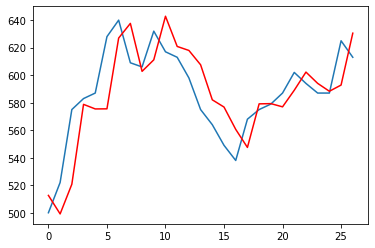

In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X= Water_Supply.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [X for X in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# RMSE Calculation
import math
Actual= [500,522,575,583,587,628,640,609,606,632,617,613,598,575,564,549,538,568,575,579,587,602,594,587,587,625,613]
Predicted= [512,499,520,578,575,575,626,637,602,611,642,620,617,607,582,576,560,547,579,579,576,589,602,594,588,592,630]

mse= sklearn.metrics.mean_squared_error(Actual, Predicted)

rmse= math.sqrt(mse)

print(rmse)

22.72867335751457
